# Kings County Regression Version 2

--- So after many regression models I've returned to the drawing board to reinclude more variables that I initially eliminated.

* Eric Ma
* Full Time Student
* Due: May 8, 2019 
* Instructor name: Fangfang Lee
* Blog post URL: *tbd

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kc_df = pd.read_csv('kc_house_data.csv')
kc_df.keys()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [3]:
kc_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
import folium

In [5]:
kc_map = folium.Map(location=[kc_df['lat'].mean(), kc_df['long'].mean()], zoom_start=11)
for i in range(0, len(kc_df['lat']), 99):
    folium.Marker([kc_df.iloc[i]['lat'], kc_df.iloc[i]['long']]).add_to(kc_map)
kc_map

## Data Cleaning V.2
-- Only dropping id, yr_renovated and zipcode from the master dataframe initially. Zipcode was too hard to work with and represented in the lat/long values. Same with year renovated.

In [6]:
kc_df.drop(['id', 'yr_renovated', 'zipcode'], axis=1, inplace=True)

In [7]:
kc_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
kc_df['waterfront'].fillna(0, inplace=True)

--- The idea here is that 'waterfront' is 0, 1 or NaN with many more 0's. Unknown values should default to 0.

In [9]:
kc_df.dropna(axis=0, inplace=True)

--- The rest of the NaN can be dropped

In [10]:
kc_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,47.6561,-122.005,4760,101930
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,47.3097,-122.327,2238,6819
8,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,47.5123,-122.337,1780,8113
9,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,47.3684,-122.031,2390,7570
10,4/3/2015,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,3,8,1860,1700.0,1965,47.6007,-122.145,2210,8925


In [11]:
kc_df['date'] = pd.to_datetime(kc_df['date'])

In [12]:
kc_df['yr_built'] = pd.to_datetime(kc_df['yr_built']).dt.date

--- cast years to dates

In [13]:
kc_df['sqft_basement'].replace('?', 0, inplace=True)

--- defaulted sqft_basement to 0

## The Data

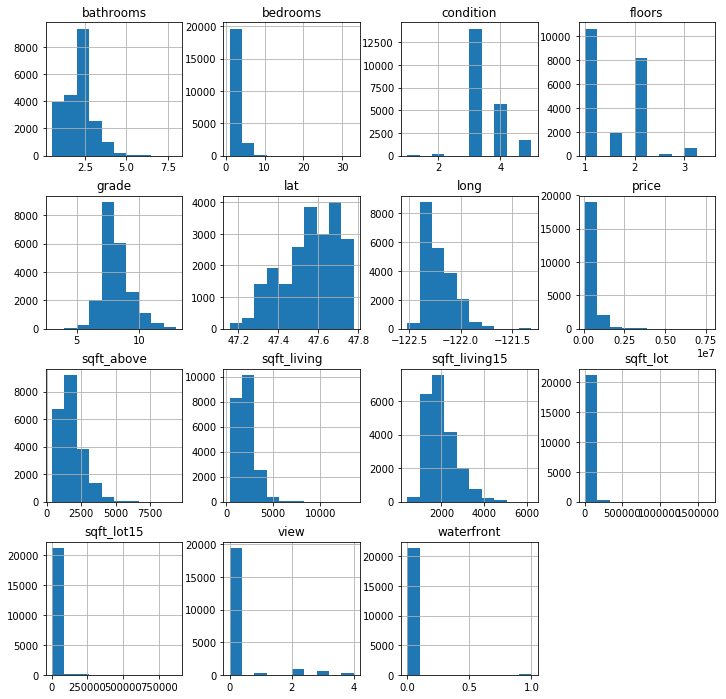

In [14]:
kc_df.hist(figsize=[12,12]);

In [15]:
kc_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.259220,0.395734,0.035393,0.668307,0.605695,0.307868,0.022417,0.585304,0.083189
bedrooms,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,-0.003733,0.078523,0.026402,0.356095,0.479148,-0.010415,0.132318,0.392874,0.030952
bathrooms,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.061115,0.186451,-0.126682,0.665312,0.686173,0.024487,0.225025,0.569139,0.088854
sqft_living,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.101982,0.282532,-0.059783,0.762398,0.876553,0.052383,0.241856,0.756208,0.184801
sqft_lot,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.021465,0.075298,-0.008375,0.115122,0.184325,-0.085143,0.230137,0.145142,0.717095
floors,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020357,0.028436,-0.264138,0.458694,0.523367,0.049419,0.125329,0.279176,-0.010850
waterfront,0.259220,-0.003733,0.061115,0.101982,0.021465,0.020357,1.000000,0.382000,0.016224,0.081195,0.069931,-0.012282,-0.037845,0.082352,0.030605
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.382000,1.000000,0.045735,0.249727,0.166299,0.006141,-0.077894,0.279561,0.073332
condition,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.016224,0.045735,1.000000,-0.147326,-0.158830,-0.015594,-0.105475,-0.093172,-0.002702
grade,0.668307,0.356095,0.665312,0.762398,0.115122,0.458694,0.081195,0.249727,-0.147326,1.000000,0.755977,0.113787,0.200821,0.713462,0.121435


In [16]:
abs(kc_df.corr()) > 0.70

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15
price,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,False,False,False,True,True,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False


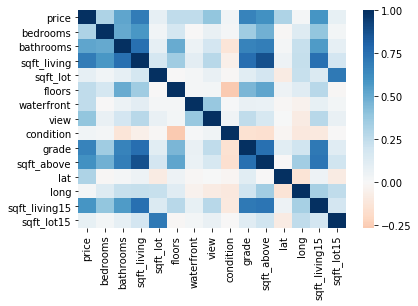

In [17]:
sns.heatmap(kc_df.corr(), center=0, cmap='RdBu');

In [18]:
kc_corrfilter = kc_df.drop(['bathrooms', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'], axis=1)
kc_corrfilter

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,lat,long
0,2014-10-13,221900.0,3,1180,5650,1.0,0.0,0.0,3,1970-01-01,47.5112,-122.257
1,2014-12-09,538000.0,3,2570,7242,2.0,0.0,0.0,3,1970-01-01,47.7210,-122.319
2,2015-02-25,180000.0,2,770,10000,1.0,0.0,0.0,3,1970-01-01,47.7379,-122.233
3,2014-12-09,604000.0,4,1960,5000,1.0,0.0,0.0,5,1970-01-01,47.5208,-122.393
4,2015-02-18,510000.0,3,1680,8080,1.0,0.0,0.0,3,1970-01-01,47.6168,-122.045
5,2014-05-12,1230000.0,4,5420,101930,1.0,0.0,0.0,3,1970-01-01,47.6561,-122.005
6,2014-06-27,257500.0,3,1715,6819,2.0,0.0,0.0,3,1970-01-01,47.3097,-122.327
8,2015-04-15,229500.0,3,1780,7470,1.0,0.0,0.0,3,1970-01-01,47.5123,-122.337
9,2015-03-12,323000.0,3,1890,6560,2.0,0.0,0.0,3,1970-01-01,47.3684,-122.031
10,2015-04-03,662500.0,3,3560,9796,1.0,0.0,0.0,3,1970-01-01,47.6007,-122.145


## Hunt for outliers

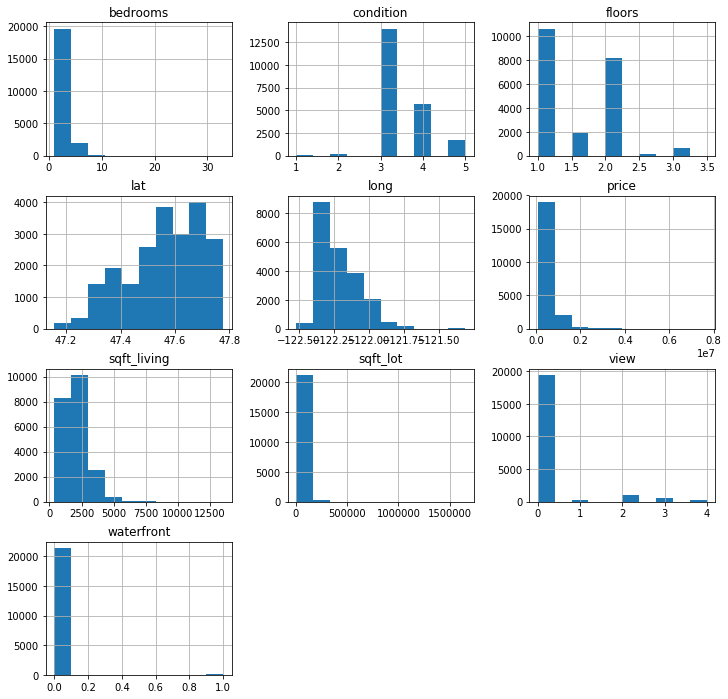

In [19]:
kc_corrfilter.hist(figsize=[12,12]);

11

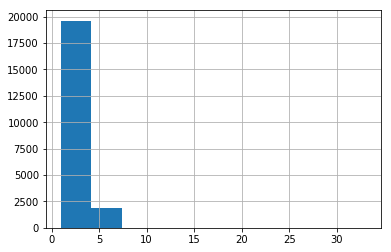

In [20]:
kc_corrfilter['bedrooms'].hist();
kc_corrfilter.loc[kc_corrfilter['bedrooms']>8, 'bedrooms'].count()

(21523, 12)


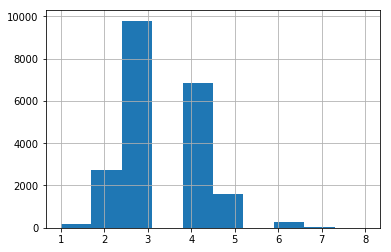

In [21]:
kc_corrfilter.drop(kc_corrfilter.loc[kc_corrfilter['bedrooms']>8, 'bedrooms'].index, axis=0, inplace=True)
print(kc_corrfilter.shape)
kc_corrfilter['bedrooms'].hist();

70

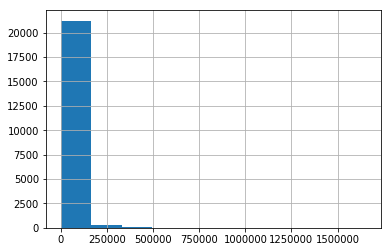

In [22]:
kc_corrfilter['sqft_lot'].hist();
kc_corrfilter.loc[kc_df['sqft_lot']>300000, 'sqft_lot'].count()

(21502, 12)


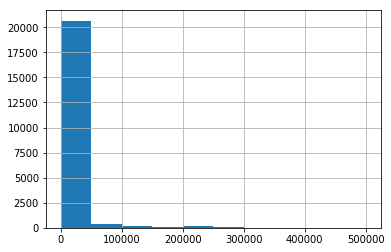

In [23]:
kc_corrfilter.drop(kc_corrfilter.loc[kc_corrfilter['sqft_lot']>500000, 'sqft_lot'].index, axis=0, inplace=True)
print(kc_corrfilter.shape)
kc_corrfilter['sqft_lot'].hist();

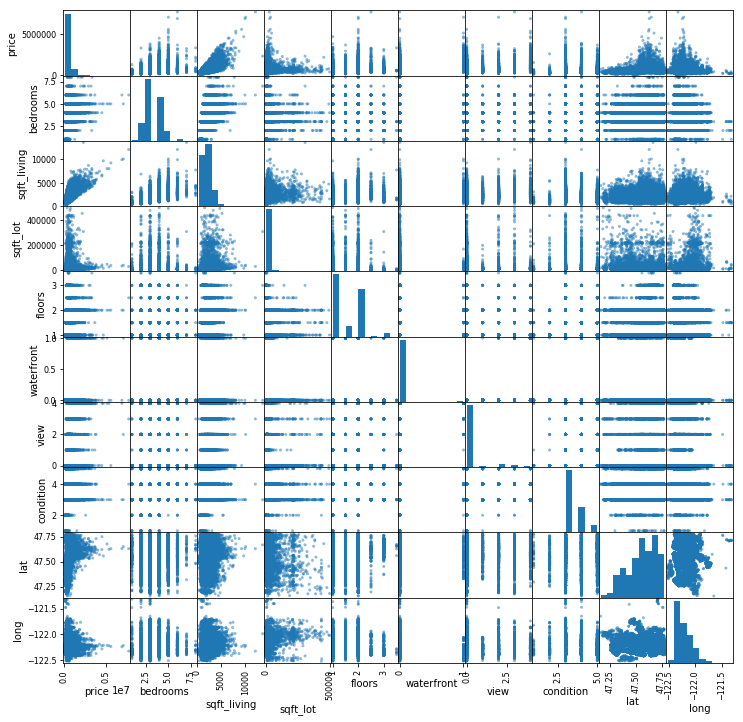

In [24]:
pd.plotting.scatter_matrix(kc_corrfilter ,figsize  = [12, 12]);

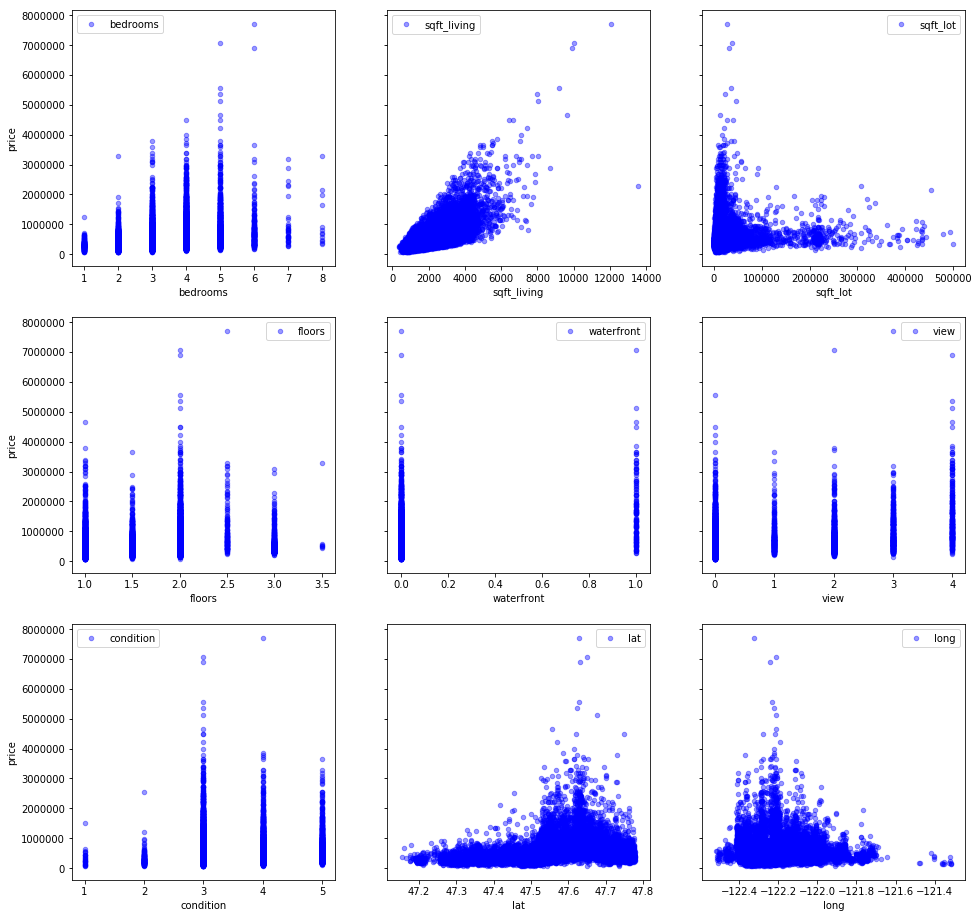

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(16,16))
for idx, ax in enumerate(kc_corrfilter.iloc[:,2:].drop(['yr_built'], axis=1).columns):
    kc_corrfilter.plot(kind='scatter', x=ax, y='price', ax=axes[idx//3][idx%3], alpha=0.4, color='b', label=ax)
plt.legend()
plt.show()

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
pred_sum = "+".join(kc_corrfilter.iloc[:,2:].columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_df, ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     4316.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        09:51:11   Log-Likelihood:            -2.9531e+05
No. Observations:               21534   AIC:                         5.906e+05
Df Residuals:                   21524   BIC:                         5.907e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.795e+07   1.42e+06    -40.759      0.000   -6.07e+07   -5.52e+07
bedrooms    -4.215e+04   2001.932    -21.056      0.000   -4.61e+04   -3.82e+04
sqft_living   282.2133      2.290    123.247      0.000     277.725     286.701
sqft_lot       -0.0123      0.038     -0.325      0.745      -0.086       0.062
floors       2.495e+04   3074.051      8.117      0.000    1.89e+04     3.1e+04
waterfront   5.845e+05   1.97e+04     29.619      0.000    5.46e+05    6.23e+05
view         6.795e+04   2226.246     30.521      0.000    6.36e+04    7.23e+04
condition    4.345e+04   2392.260     18.161      0.000    3.88e+04    4.81e+04
lat          6.842e+05    1.1e+04     62.448      0.000    6.63e+05    7.06e+05
long         -2.07e+05   1.14e+04    -18.084      0.000   -2.29e+05   -1.85e+05
==============================================================================
Omnibus:                    15600.997   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           856935.376
Skew:                           2.927   Prob(JB):                         0.00
Kurtosis:                      33.345   Cond. No.                     4.20e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

--- Rsquared is still unimpressive

## Binning
--- Rebinning the categorical data.

In [40]:
# kc_corrfilter["floors"] = kc_corrfilter["floors"].astype('category').cat.as_ordered
# kc_corrfilter["view"] = kc_corrfilter["view"].astype('category').cat.as_ordered
# kc_corrfilter["condition"] = kc_corrfilter["condition"].astype('category').cat.as_ordered
# kc_corrfilter["yr_built"] = kc_corrfilter["yr_built"].astype('category').cat.as_ordered

In [28]:
# floor_dummies = pd.get_dummies(kc_corrfilter["floors"], prefix="floor", drop_first=True)
# view_dummies = pd.get_dummies(kc_corrfilter["view"], prefix="view", drop_first=True)
# cond_dummies = pd.get_dummies(kc_corrfilter["condition"], prefix="cond", drop_first=True)

In [29]:
# kc_corrfilter = pd.concat([kc_corrfilter, floor_dummies, view_dummies, cond_dummies], axis=1)

In [30]:
# kc_corrfilter.columns

Index(['date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'yr_built', 'lat', 'long',
       'floor_1.5', 'floor_2.0', 'floor_2.5', 'floor_3.0', 'floor_3.5',
       'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'cond_2', 'cond_3',
       'cond_4', 'cond_5'],
      dtype='object')

In [32]:
# kc_corrfilter['floor_1.5'].dtype

dtype('uint8')

In [33]:
# kc_corrfilter.drop(['floors', 'view', 'condition'], axis=1)

,date,price,bedrooms,sqft_living,sqft_lot,waterfront,yr_built,lat,long,floor_1.5,...,floor_3.0,floor_3.5,view_1.0,view_2.0,view_3.0,view_4.0,cond_2,cond_3,cond_4,cond_5
0,2014-10-13,221900.0,3,1180,5650,0.0,1970-01-01,47.5112,-122.257,0,...,0,0,0,0,0,0,0,1,0,0
1,2014-12-09,538000.0,3,2570,7242,0.0,1970-01-01,47.7210,-122.319,0,...,0,0,0,0,0,0,0,1,0,0
2,2015-02-25,180000.0,2,770,10000,0.0,1970-01-01,47.7379,-122.233,0,...,0,0,0,0,0,0,0,1,0,0
3,2014-12-09,604000.0,4,1960,5000,0.0,1970-01-01,47.5208,-122.393,0,...,0,0,0,0,0,0,0,0,0,1
4,2015-02-18,510000.0,3,1680,8080,0.0,1970-01-01,47.6168,-122.045,0,...,0,0,0,0,0,0,0,1,0,0
5,2014-05-12,1230000.0,4,5420,101930,0.0,1970-01-01,47.6561,-122.005,0,...,0,0,0,0,0,0,0,1,0,0
6,2014-06-27,257500.0,3,1715,6819,0.0,1970-01-01,47.3097,-122.327,0,...,0,0,0,0,0,0,0,1,0,0
8,2015-04-15,229500.0,3,1780,7470,0.0,1970-01-01,47.5123,-122.337,0,...,0,0,0,0,0,0,0,1,0,0
9,2015-03-12,323000.0,3,1890,6560,0.0,1970-01-01,47.3684,-122.031,0,...,0,0,0,0,0,0,0,1,0,0
10,2015-04-03,662500.0,3,3560,9796,0.0,1970-01-01,47.6007,-122.145,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
# outcome = 'price'
# pred_sum = "+".join(kc_corrfilter.iloc[:,2:].columns)
# formula = outcome + "~" + pred_sum
# model = ols(formula= formula, data=kc_df, ).fit()
# model.summary()

SyntaxError: invalid syntax (<unknown>, line 1)

## Variance!

I am having trouble subduing the variance. The variance particularly in the 'sqft_living' data is higher the further from the mean we go.

In [27]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('fivethirtyeight')

/Users/ericma/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


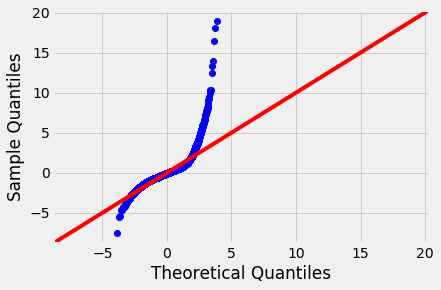

In [28]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
fig.show()

In [29]:
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name, test))

[('Jarque-Bera', 856935.375647528),
 ('Prob', 0.0),
 ('Skew', 2.926562972956071),
 ('Kurtosis', 33.34484469340907)]

In [30]:
outcome = 'price'
pred_sum = "+".join(kc_corrfilter.loc[:,['sqft_living', 'waterfront', 'lat', 'long']].columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     8529.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        17:04:26   Log-Likelihood:            -2.9619e+05
No. Observations:               21534   AIC:                         5.924e+05
Df Residuals:                   21529   BIC:                         5.924e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.547e+07   1.43e+06    -45.798      0.000   -6.83e+07   -6.27e+07
sqft_living   276.8066      1.762    157.088      0.000     273.353     280.261
waterfront   8.404e+05   1.91e+04     43.950      0.000    8.03e+05    8.78e+05
lat          6.867e+05   1.14e+04     60.475      0.000    6.64e+05    7.09e+05
long        -2.681e+05   1.15e+04    -23.260      0.000   -2.91e+05   -2.45e+05
==============================================================================
Omnibus:                    15290.126   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           747251.308
Skew:                           2.875   Prob(JB):                         0.00
Kurtosis:                      31.280   Cond. No.                     2.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/ericma/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


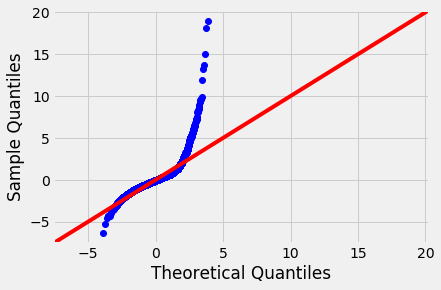

In [31]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
fig.show()

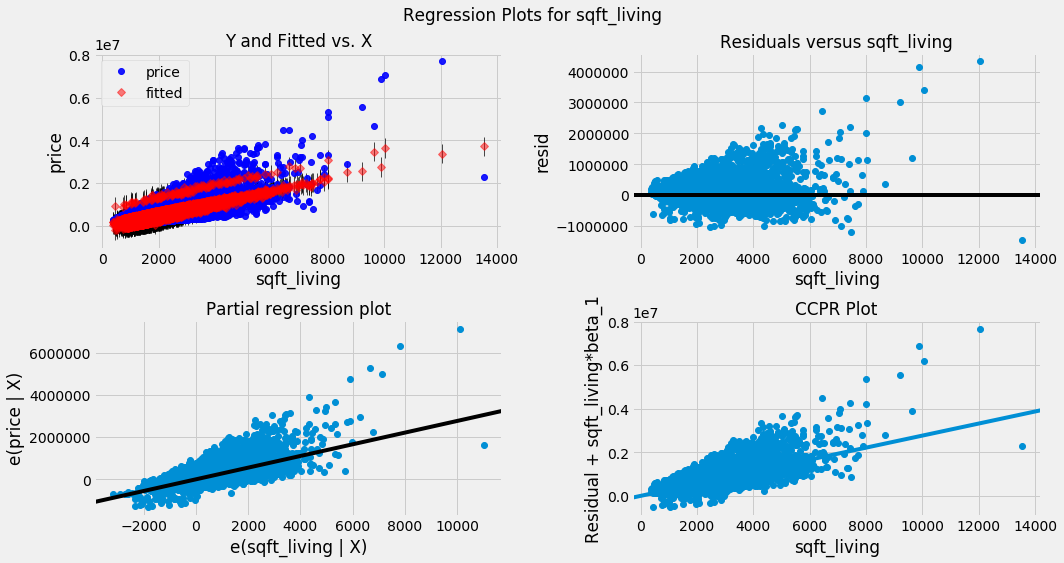

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

/Users/ericma/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


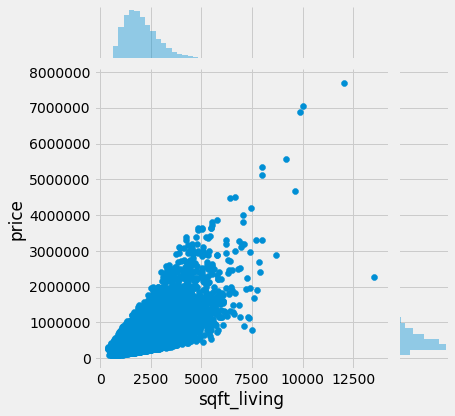

In [33]:
sns.jointplot(x='sqft_living', y='price', data=kc_corrfilter, kind='scatter')

--- There is a huge skew in the price. Its even more skewed than the independent features.

## Normalize the target. 
Crazy thought thanks to John. I'm going to unskew the price. I justify this by reasoning that the natural unit for money is logarithmic which includes price. 

In [68]:
log_price = np.log(kc_corrfilter['price'])
norm_price = (log_price-np.mean(log_price))/np.sqrt(np.var(log_price))

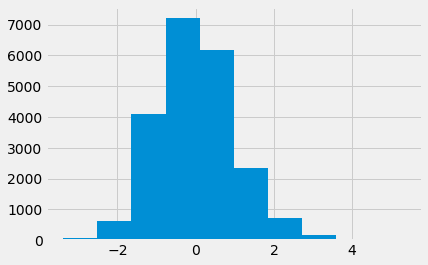

In [69]:
norm_price.hist();

### Eureka!

In [70]:
kc_corrfilter.head()

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,lat,long
0,2014-10-13,221900.0,3,1180,5650,1.0,0.0,0.0,3,1970-01-01,47.5112,-122.257
1,2014-12-09,538000.0,3,2570,7242,2.0,0.0,0.0,3,1970-01-01,47.7210,-122.319
2,2015-02-25,180000.0,2,770,10000,1.0,0.0,0.0,3,1970-01-01,47.7379,-122.233
3,2014-12-09,604000.0,4,1960,5000,1.0,0.0,0.0,5,1970-01-01,47.5208,-122.393
4,2015-02-18,510000.0,3,1680,8080,1.0,0.0,0.0,3,1970-01-01,47.6168,-122.045


In [71]:
norm_price = pd.DataFrame(norm_price)

In [73]:
norm_price.rename(columns={'price':'norm_price'}, inplace=True)

In [74]:
kc_norm = pd.concat([norm_price, kc_corrfilter], axis=1)

In [76]:
kc_norm.drop(['date', 'price'], axis=1, inplace=True)

In [80]:
kc_norm.head()

,norm_price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,lat,long
0,-1.401671,3,1180,5650,1.0,0.0,0.0,3,1970-01-01,47.5112,-122.257
1,0.281899,3,2570,7242,2.0,0.0,0.0,3,1970-01-01,47.7210,-122.319
2,-1.799490,2,770,10000,1.0,0.0,0.0,3,1970-01-01,47.7379,-122.233
3,0.501872,4,1960,5000,1.0,0.0,0.0,5,1970-01-01,47.5208,-122.393
4,0.180295,3,1680,8080,1.0,0.0,0.0,3,1970-01-01,47.6168,-122.045


/Users/ericma/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


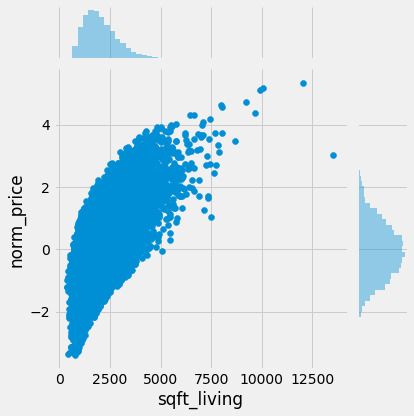

In [81]:
sns.jointplot(x='sqft_living', y='norm_price', data=kc_norm, kind='scatter')

In [82]:
outcome = 'log_price'
pred_sum = "+".join(kc_norm.iloc[:,1:].columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_norm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     5530.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        17:30:27   Log-Likelihood:                -3811.1
No. Observations:               21502   AIC:                             7642.
Df Residuals:                   21492   BIC:                             7722.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -78.1925      1.898    -41.203      0.000     -81.912     -74.473
bedrooms       -0.0274      0.003     -9.830      0.000      -0.033      -0.022
sqft_living     0.0004   3.09e-06    117.361      0.000       0.000       0.000
sqft_lot      3.17e-07   6.54e-08      4.844      0.000    1.89e-07    4.45e-07
floors          0.0988      0.004     24.241      0.000       0.091       0.107
waterfront      0.3340      0.026     12.759      0.000       0.283       0.385
view            0.0935      0.003     31.707      0.000       0.088       0.099
condition       0.0806      0.003     25.461      0.000       0.074       0.087
lat             1.5569      0.015    107.321      0.000       1.528       1.585
long           -0.1316      0.015     -8.623      0.000      -0.161      -0.102
==============================================================================
Omnibus:                      658.006   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1783.179
Skew:                          -0.004   Prob(JB):                         0.00
Kurtosis:                       4.411   Cond. No.                     3.38e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/ericma/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


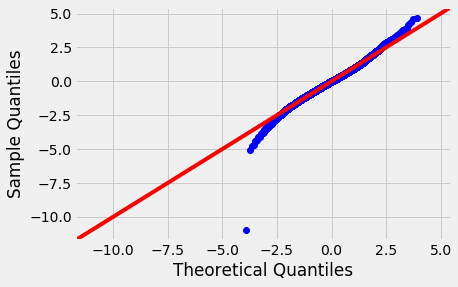

In [83]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
fig.show()

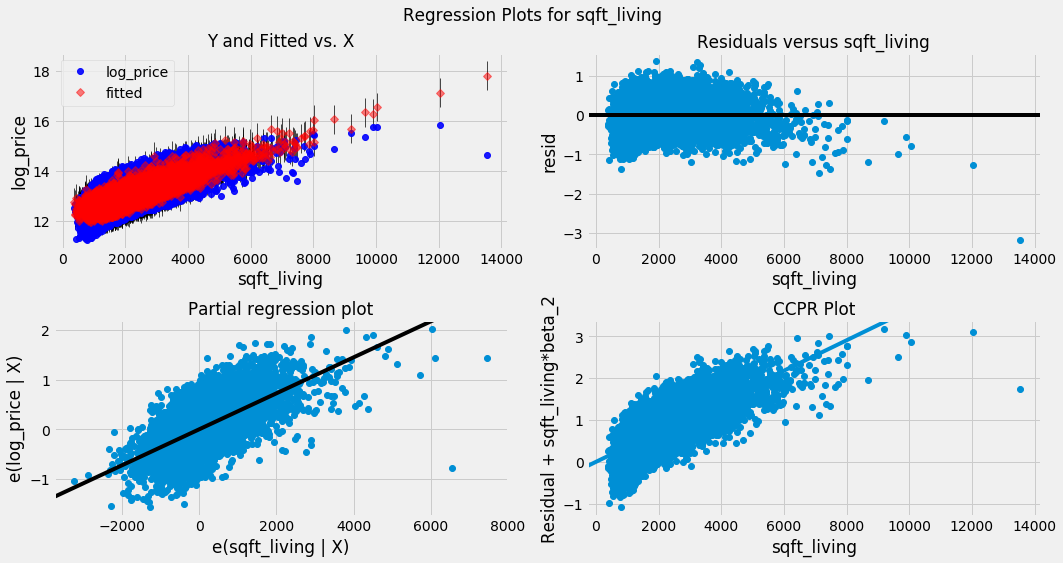

In [84]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

## Stepwise selection with p-values

In [89]:
y = kc_norm[["norm_price"]]
X = kc_norm.drop(["norm_price", "yr_built"], axis=1)

In [94]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [95]:
stepwise_selection(X, y)

Add  sqft_living                    with p-value 0.0
Add  lat                            with p-value 0.0
Add  view                           with p-value 0.0
Add  condition                      with p-value 3.13571e-84
Add  floors                         with p-value 1.15774e-125
Add  waterfront                     with p-value 2.06332e-39
Add  bedrooms                       with p-value 4.09407e-24
Add  long                           with p-value 1.03091e-14
Add  sqft_lot                       with p-value 1.2804e-06


['sqft_living',
 'lat',
 'view',
 'condition',
 'floors',
 'waterfront',
 'bedrooms',
 'long',
 'sqft_lot']

In [100]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y)

/Users/ericma/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
selector.support_ 

array([False, False, False,  True,  True,  True, False,  True,  True])

In [102]:
selector.ranking_

array([2, 4, 5, 1, 1, 1, 3, 1, 1])

--- Takeaways: According to my model, square footage living space, latitude, view and condition are the most important things to consider out of the dataset we were given. The other variables are either lower priority to homebuyers or highly correlated to these four variables.

### Regression Model Validation

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [104]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [105]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: norm_price    0.30168
dtype: float64
Test Mean Squarred Error: norm_price    0.301472
dtype: float64


In [106]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.3016804960561188
Test Mean Squarred Error: 0.30147188085577475
